In [2]:
import numpy as np
import os
import time
import scipy
import glob
import sys
from datetime import datetime
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

import importlib
import pandas as pd
import scipy.stats as spstats

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util

import behavior as butil
import plotting as putil
import google_drive as gdrive
import trajectory as traj
from matplotlib.gridspec import GridSpec


In [3]:
importlib.reload(util)
util.set_sns_style(style='dark')
%matplotlib notebook

In [9]:
# if util.get_os() == 'Linux':
#     rootdir = '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'
# elif util.get_os() == 'Darwin':
#     rootdir = '/home/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
# else:
#     rootdir=None
#     print("Unknown os: {}".format(util.get_os()))
rootdir = util.get_rootdir()
experiment = 'PAM_activation_fed-flies'

src_dir = os.path.join(rootdir, experiment)
# # src_dir = '/Users/julianarhee/Documents/rutalab/data/test'
# print(src_dir)
fig_id = os.path.join('/Edge_Tracking', rootdir.split('/Edge_Tracking/')[1], experiment)
print(fig_id)
savedir = '{}/jyr/{}'.format(rootdir, experiment)
savedir = savedir.replace(" ", "")
figdir = os.path.join(savedir, 'figures')
print("Saving figures to:{}    {}".format('\n', figdir))
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Edge_Tracking/Data/PAM_activation_fed-flies
Saving figures to:
    /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures


In [4]:
# copy files?
# There are 2 sources from Andy/Chad:  mutltiple_reinforcemnet (7 paired) and not_reinforced/reinforced (15)
copy_files=False
orig_log = glob.glob(os.path.join(src_dir, '*', '*.log'))
copied_log = glob.glob(os.path.join(savedir, 'raw', '*.log'))
new_src_dir = os.path.join(savedir, 'raw')

if len(orig_log)>0 and len(copied_log)!=len(orig_log):
#     copy_files=True
    print("Need to copy files from orig loc to <{}>".format(os.path.join(savedir, 'raw')))
# else:
#     src_dir = os.path.join(savedir, 'raw')
#     print("Found {} .log file in new src dir: {}".format(len(copied_log), src_dir))
if copy_files:
    import shutil
    for tmp_src in os.listdir(os.path.join(src_dir, 'multiple_reinforcement')):
        curr_logs = glob.glob(os.path.join(src_dir, 'multiple_reinforcement', tmp_src, '*.log'))
        for fn in curr_logs:
            fbase = os.path.split(fn)[-1]
            if os.path.exists( os.path.join(new_src_dir, fbase)):
                continue
            shutil.copy(fn, os.path.join(new_src_dir, fbase))

Found 21 .log file in new src dir: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw


In [10]:
print(src_dir)

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/PAM_activation_fed-flies'

In [11]:
# There are 2 sources from Andy/Chad:  mutltiple_reinforcemnet (7 paired) and not_reinforced/reinforced (15)
copy_files=True
orig_log = glob.glob(os.path.join(src_dir,  '*','*.log'))
copied_log = glob.glob(os.path.join(savedir, 'raw', '*.log'))
new_src_dir = os.path.join(savedir, 'raw')

# if len(orig_log)>0 and len(copied_log)!=len(orig_log):
#     copy_files=True
#     print("Need to copy files from orig loc to <{}>".format(os.path.join(savedir, 'raw')))
# else:
#     src_dir = os.path.join(savedir, 'raw')
#     print("Found {} .log file in new src dir: {}".format(len(copied_log), src_dir))
if copy_files:
    import shutil
    #for tmp_src in os.listdir(os.path.join(src_dir, 'not_reinforced')):
    curr_logs = glob.glob(os.path.join(src_dir, '*', '*.log'))
    for fn in curr_logs:
        fbase = os.path.split(fn)[-1]
        if os.path.exists( os.path.join(new_src_dir, fbase)):
            continue
        shutil.copy(fn, os.path.join(new_src_dir, fbase))
copy_files=False
src_dir = new_src_dir

Need to copy files from orig loc to </home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw>


In [16]:
new_src_dir = os.path.join(savedir, 'raw')
src_dir = new_src_dir

print(src_dir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw


In [17]:
log_files = butil.get_log_files(src_dir=src_dir, experiment=experiment, verbose=False, is_gdrive=False,
                        return_loginfo=False)

Checking parent dir.
Found 54 tracking files.


In [19]:
log_files[0:5]

['/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/08152020-163802_Fly2_fed_no_lights.log',
 '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/08152020-164450_Fly2_fed_lights.log',
 '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/08152020-174157_Fly3_fed_no_lights.log',
 '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/08152020-175117_Fly3_fed_lights.log',
 '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/08152020-180346_Fly1_fed_no_lights.log']

## double-check actiation inside/outside first

In [ ]:
importlib

In [22]:
fn = '08152020-164450_Fly2_fed_lights.log'
fpath = os.path.join(src_dir, fn)
df0 = pd.read_csv(fpath, encoding='latin' )
df_ = butil.load_dataframe(fpath, experiment=experiment)
# df_ = butil.correct_manual_conditions(df_, experiment, logdf=logdf)
df_ = butil.process_df(df_)
print(df0.columns)
df_['condition'].unique()

[bout 3]  too short instrip, should be OUT
[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 7]  too short instrip, should be OUT
[bout 11]  too short instrip, should be OUT
[bout 12]  too short outstrip, should be IN
[bout 13]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 19]  too short instrip, should be OUT
[bout 21]  too short instrip, should be OUT
[bout 22]  too short outstrip, should be IN
[bout 23]  too short instrip, should be OUT
[bout 27]  too short instrip, should be OUT
[bout 28]  too short outstrip, should be IN
[bout 37]  too short instrip, should be OUT
[bout 38]  too short outstrip, should be IN
[bout 51]  too short instrip, should be OUT
[bout 52]  too short outstrip, should be IN
[bout 53]  too short instrip, should be OUT
[bout 54]  too short outstrip, should be IN
[bout 55]  too short instrip, should be OUT
[bout 56]  too short outstrip, should be IN
[bout 57]  too short instrip, should

array(['fed_lights'], dtype=object)

In [27]:
odor_mfc = butil.get_odor_mfc(df0)
odor_mfc
df0['led_on'] = df0['led1_stpt']==0
df0['instrip'] = df0[odor_mfc]>0

'mfc3_stpt'

<IPython.core.display.Javascript object>


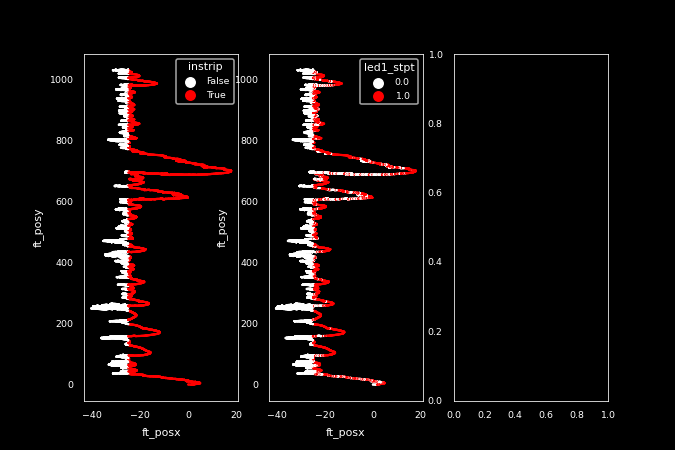

<IPython.core.display.Javascript object>


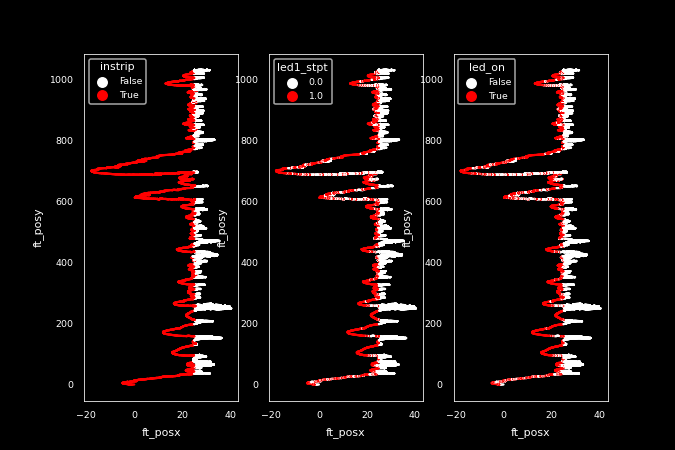

<AxesSubplot: xlabel='ft_posx', ylabel='ft_posy'>

In [30]:
fig, axn = pl.subplots(1,3)
sns.scatterplot(data=df0, x='ft_posx', y='ft_posy', hue='instrip', ax=axn[0],
                palette={True: 'r', False: 'w'}, s=2, edgecolor='none')
sns.scatterplot(data=df0, x='ft_posx', y='ft_posy', hue='led1_stpt', ax=axn[1],
                palette={True: 'r', False: 'w'}, s=2, edgecolor='none')

fig, axn = pl.subplots(1,3)
sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='instrip', ax=axn[0],
                palette={True: 'r', False: 'w'}, s=2, edgecolor='none')
sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='led1_stpt', ax=axn[1],
                palette={True: 'r', False: 'w'}, s=2, edgecolor='none')
sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='led_on', ax=axn[2],
                palette={True: 'r', False: 'w'}, s=2, edgecolor='none')

# Load and save COMBINED datafiles

In [33]:
create_new=True
strip_width=50
strip_sep=1000
# ---------------------------------
log_files = butil.get_log_files(src_dir=src_dir, experiment=experiment, verbose=False, is_gdrive=False,
                        return_loginfo=False)
# is_csv = False
if not create_new:
    df_fpath = os.path.join(savedir, 'combined_df0.pkl')
    df0_all = butil.load_df(df_fpath)
else:
    df0_all = butil.load_combined_df(log_files=log_files, logdf=None, src_dir=src_dir,
                                is_csv=False, experiment=experiment, 
                                savedir=savedir, save_errors=False, create_new=create_new,
                                parse_filename=True, remove_invalid=True, process=True, combined_fbase='combined_df0')
# Make some fixes
df0_all.loc[df0_all['condition']=='pamchr_fed_no_lights', 'condition'] = 'no_lights'
df0_all.loc[df0_all['condition']=='pamchr_fed_lights', 'condition'] = 'lights'
df0_all.loc[df0_all['condition']=='pamchr_fed_single', 'condition'] = 'single'
df0_all.loc[df0_all['condition']=='pam_activation', 'condition'] = 'lights'
df0_all.loc[df0_all['condition']=='no_lights', 'led_on'] = False

condition_list = df0_all['condition'].unique()
print("Found {} conditions:".format(len(condition_list)))
for c in condition_list:
    print(c)

if create_new: # save
    df_fpath = os.path.join(savedir, 'combined_df0.pkl')
    print("Saving combined df to: {}".format(savedir))
    butil.save_df(df0_all, df_fpath)
create_new=False


Checking parent dir.
Found 54 tracking files.
Processing 54 tracking files.
Creating combined df
[WARNING] ['08162020-165210_Fly4_fed_lights']: Found bad skips, removing 41070 of 41321 samples.
[WARNING] ['08172020-121911_Fly8_lights']: Found bad skips, removing 2172 of 36696 samples.
[WARNING] ['08172020-151907_Fly9_fed_no_lights']: Found bad skips, removing 265 of 19331 samples.
[WARNING] ['08172020-174615_Fly12_fed_no_lights']: Found bad skips, removing 8414 of 36108 samples.
[WARNING] ['09252020-111252_Fly1_PAMChr_fed_no_lights']: Found bad skips, removing 15661 of 35872 samples.
[WARNING] ['09252020-112354_Fly1_PAMChr_fed_single']: Found bad skips, removing 6494 of 39565 samples.
[WARNING] ['20230130-144015_PAM_activation_fly2-PAM-ChR-fed-ythresh0_001']: Found bad skips, removing 9581 of 129323 samples.


/home/julianarhee/Repositories/plume-tracking/behavior.py:313: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(fpath, encoding='latin' )#, sep=",", skiprows=[1], header=0,
/home/julianarhee/Repositories/plume-tracking/behavior.py:313: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(fpath, encoding='latin' )#, sep=",", skiprows=[1], header=0,


[WARNING] ['20230222-164642_PAM_activation_fly3-PAM-ChR-fedF_000']: Found bad skips, removing 18100 of 66235 samples.
Correcting experiment conditions: PAM_activation_fed-flies
[bout 3]  too short instrip, should be OUT
[bout 3]  too short instrip, should be OUT
[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 7]  too short instrip, should be OUT
[bout 11]  too short instrip, should be OUT
[bout 12]  too short outstrip, should be IN
[bout 13]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 19]  too short instrip, should be OUT
[bout 21]  too short instrip, should be OUT
[bout 22]  too short outstrip, should be IN
[bout 23]  too short instrip, should be OUT
[bout 27]  too short instrip, should be OUT
[bout 28]  too short outstrip, should be IN
[bout 37]  too short instrip, should be OUT
[bout 38]  too short outstrip, should be IN
[bout 51]  too short instrip, should be OUT
[bout 52]  too short outstrip, shoul

[bout 2]  too short outstrip, should be IN
[bout 5]  too short instrip, should be OUT
[bout 8]  too short outstrip, should be IN
[bout 10]  too short outstrip, should be IN
[bout 12]  too short outstrip, should be IN
[bout 14]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 17]  too short instrip, should be OUT
[bout 18]  too short outstrip, should be IN
[bout 19]  too short instrip, should be OUT
[bout 20]  too short outstrip, should be IN
[bout 23]  too short instrip, should be OUT
[bout 25]  too short instrip, should be OUT
[bout 26]  too short outstrip, should be IN
[bout 28]  too short outstrip, should be IN
[bout 34]  too short outstrip, should be IN
[bout 36]  too short outstrip, should be IN
[bout 37]  too short instrip, should be OUT
[bout 38]  too short outstrip, should be IN
[bout 39]  too short instrip, should be OUT
[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 14]  too short outstrip, should

[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 9]  too short instrip, should be OUT
[bout 10]  too short outstrip, should be IN
[bout 11]  too short instrip, should be OUT
[bout 12]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 17]  too short instrip, should be OUT
[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 4]  too short outstrip, should be IN
[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 7]  too short instrip, should be OUT
[bout 8]  too short outstrip, should be IN
[bout 11]  too short instrip, should be OUT
[bout 12]  too short outstrip, should be IN
[bout 13]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 19]  too short instrip, should be OUT
[bout 22]  too short outstrip, should be IN


[bout 11]  too short instrip, should be OUT
[bout 12]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 17]  too short instrip, should be OUT
[bout 21]  too short instrip, should be OUT
[bout 22]  too short outstrip, should be IN
[bout 31]  too short instrip, should be OUT
[bout 34]  too short outstrip, should be IN
[bout 35]  too short instrip, should be OUT
[bout 39]  too short instrip, should be OUT
[bout 43]  too short instrip, should be OUT
[bout 44]  too short outstrip, should be IN
[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 4]  too short outstrip, should be IN
[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 7]  too short instrip, should be OUT
[bout 8]  too short outstrip, should be IN
[bout 9]  too short instrip, should be OUT
[bout 11]  too short instrip, should be OUT
[bout 15]  too short instrip, should be OUT
[bout 16]  too short outstrip, should be

[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 16]  too short outstrip, should be IN
[bout 33]  too short instrip, should be OUT
[bout 34]  too short outstrip, should be IN
[bout 35]  too short instrip, should be OUT
[bout 36]  too short outstrip, should be IN
[bout 37]  too short instrip, should be OUT
[bout 52]  too short outstrip, should be IN
[bout 53]  too short instrip, should be OUT
[bout 29]  too short instrip, should be OUT
[bout 30]  too short outstrip, should be IN
[bout 31]  too short instrip, should be OUT
[bout 29]  too short instrip, should be OUT
[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 4]  too short outstrip, should be IN
[bout 2]  too short outstrip, should be IN
[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 7]  too short instrip, should be OUT
[bout 8]  too short outstrip, should be I

[bout 36]  too short outstrip, should be IN
[bout 37]  too short instrip, should be OUT
[bout 38]  too short outstrip, should be IN
[bout 43]  too short instrip, should be OUT
[bout 45]  too short instrip, should be OUT
[bout 51]  too short instrip, should be OUT
[bout 52]  too short outstrip, should be IN
[bout 53]  too short instrip, should be OUT
[bout 54]  too short outstrip, should be IN
[bout 55]  too short instrip, should be OUT
[bout 56]  too short outstrip, should be IN
[bout 57]  too short instrip, should be OUT
[bout 58]  too short outstrip, should be IN
[bout 64]  too short outstrip, should be IN
[bout 72]  too short outstrip, should be IN
[bout 75]  too short instrip, should be OUT
[bout 76]  too short outstrip, should be IN
[bout 77]  too short instrip, should be OUT
[bout 79]  too short instrip, should be OUT
[bout 83]  too short instrip, should be OUT
[bout 84]  too short outstrip, should be IN
[bout 88]  too short outstrip, should be IN
[bout 89]  too short instrip, sh

[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 8]  too short outstrip, should be IN
[bout 10]  too short outstrip, should be IN
[bout 12]  too short outstrip, should be IN
[bout 13]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 16]  too short outstrip, should be IN
[bout 21]  too short instrip, should be OUT
[bout 22]  too short outstrip, should be IN
[bout 23]  too short instrip, should be OUT
[bout 24]  too short outstrip, should be IN
[bout 25]  too short instrip, should be OUT
[bout 26]  too short outstrip, should be IN
[bout 27]  too short instrip, should be OUT
[bout 28]  too short outstrip, should be IN
[bout 30]  too short outstrip, should be IN
[bout 31]  too short instrip, should be OUT
[bout 32]  too short outstrip, should be IN
[bout 33]  too short instrip, should 

[bout 29]  too short instrip, should be OUT
[bout 30]  too short outstrip, should be IN
[bout 31]  too short instrip, should be OUT
[bout 32]  too short outstrip, should be IN
[bout 33]  too short instrip, should be OUT
[bout 29]  too short instrip, should be OUT
[bout 30]  too short outstrip, should be IN
[bout 31]  too short instrip, should be OUT
[bout 29]  too short instrip, should be OUT
[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 12]  too short outstrip, should be IN
[bout 13]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 16]  too short outstrip, should be IN
[bout 17]  too short instrip, should be OUT
[bout 19]  too short instrip, should be OUT
[bout 24]  too short outstrip, should be IN
[bout 25]  too short instrip, should be OUT
[bout 26]  too short outstrip, should be IN
[bout 27]  too short instrip, shoul

In [49]:
df0_fpath = os.path.join(savedir, 'combined_df0.pkl')
print("Saving combined df to: {}".format(savedir))
butil.save_df(df0_all[df0_all['date']<20230101], df0_fpath)

Saving combined df to: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies


## also add NEW files

In [112]:
print(src_dir)
new_logfiles = glob.glob(os.path.join(src_dir, 'new', '*.log'))
len(new_logfiles)
new_logfiles

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw


['/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/new/20230222-164642_PAM_activation_fly3-PAM-ChR-fedF_000.log',
 '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/new/20230130-144015_PAM_activation_fly2-PAM-ChR-fed-ythresh0_001.log',
 '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/new/20230222-142948_PAM_activation_fly1-PAM-ChR-fedF_000.log',
 '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/new/20230222-140516_strip_grid_fly1-PAM-ChR-fedF_000.log',
 '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/new/20230130-133449_PAM_activation_fly2-PAM-ChR-fed_000.log',
 '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/new/20230201-110341_PAM_activation_fly1-PAM-ChR-fed-ythresh1000_000.log']

In [113]:
create_new=True
if not create_new:
    df1_fpath = os.path.join(savedir, 'combined_df1.pkl')
    df1_all = butil.load_df(df1_fpath)
else:
    print("creating new...")
    df1_all = butil.load_combined_df(log_files=new_logfiles, logdf=None, src_dir=src_dir,
                                is_csv=False, experiment=experiment, 
                                savedir=savedir, save_errors=False, create_new=create_new,
                                parse_filename=True, remove_invalid=True, process=True, combined_fbase='combined_df1')
    # fix some condition info
    df1_all['led_on'] = df1_all['led1_stpt']==1
    df1_all.loc[df1_all['condition']=='pam_activation', 'condition'] = 'lights'
    df1_all.loc[df1_all['condition']=='strip_grid', 'condition'] = 'no_lights'
    df1_all.loc[df1_all['filename']=='20230130-133449_PAM_activation_fly2-PAM-ChR-fed_000', 'condition'] = 'no_lights'
    # save
    df1_fpath = os.path.join(savedir, 'combined_df1.pkl')
    butil.save_df(df1_all, df1_fpath)

df0_all.shape, df1_all.shape
create_new=False

creating new...
Processing 6 tracking files.
Creating combined df


/home/julianarhee/Repositories/plume-tracking/behavior.py:313: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(fpath, encoding='latin' )#, sep=",", skiprows=[1], header=0,


[WARNING] ['20230222-164642_PAM_activation_fly3-PAM-ChR-fedF_000']: Found bad skips, removing 18100 of 58866 samples.
[WARNING] ['20230130-144015_PAM_activation_fly2-PAM-ChR-fed-ythresh0_001']: Found bad skips, removing 9581 of 123846 samples.
[WARNING] ['20230130-133449_PAM_activation_fly2-PAM-ChR-fed_000']: Found bad skips, removing 192 of 17492 samples.
Correcting experiment conditions: PAM_activation_fed-flies
[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 7]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 17]  too short instrip, should be OUT
[bout 18]  too short outstrip, should be IN
[bout 19]  too short instrip, should be OUT
[bout 21]  too short instrip, should be OUT
[bout 22]  too short outstrip, should be IN
[bout 23]  too short instrip, should be OUT
[bout 24]  too short outstrip, should be IN
[bout 11]  too short instrip, should be OUT
[bout 13]  to

[bout 19]  too short instrip, should be OUT
[bout 37]  too short instrip, should be OUT
[bout 81]  too short instrip, should be OUT
[bout 82]  too short outstrip, should be IN
[bout 124]  too short outstrip, should be IN
[bout 125]  too short instrip, should be OUT
[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 5]  too short instrip, should be OUT
[bout 7]  too short instrip, should be OUT
[bout 8]  too short outstrip, should be IN
[bout 9]  too short instrip, should be OUT
[bout 10]  too short outstrip, should be IN
[bout 11]  too short instrip, should be OUT
[bout 12]  too short outstrip, should be IN
[bout 16]  too short outstrip, should be IN
[bout 17]  too short instrip, should be OUT
[bout 18]  too short outstrip, should be IN
[bout 19]  too short instrip, should be OUT
[bout 20]  too short outstrip, should be IN
[bout 21]  too short instrip, should be OUT
[bout 23]  too short instrip, should be OUT
[bout 24]  too short outstrip, shoul

[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 4]  too short outstrip, should be IN
[bout 7]  too short instrip, should be OUT
[bout 11]  too short instrip, should be OUT
[bout 13]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 16]  too short outstrip, should be IN
[bout 17]  too short instrip, should be OUT
[bout 18]  too short outstrip, should be IN
[bout 21]  too short instrip, should be OUT
[bout 22]  too short outstrip, should be IN
[bout 24]  too short outstrip, should be IN
[bout 25]  too short instrip, should be OUT
[bout 26]  too short outstrip, should be IN
[bout 27]  too short instrip, should be OUT
[bout 30]  too short outstrip, should be IN
[bout 33]  too short instrip, should be OUT
[bout 34]  too short outstrip, should be IN
[bout 39]  too short instrip, should be OUT
[bout 40]  too short outstrip, should be IN
[bout 41]  too short instrip, should

[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 17]  too short instrip, should be OUT
[bout 18]  too short outstrip, should be IN
[bout 19]  too short instrip, should be OUT
[bout 29]  too short instrip, should be OUT
[bout 30]  too short outstrip, should be IN
[bout 31]  too short instrip, should be OUT
[bout 32]  too short outstrip, should be IN
[bout 38]  too short outstrip, should be IN
[bout 59]  too short instrip, should be OUT
[bout 63]  too short instrip, should be OUT
[bout 92]  too short outstrip, should be IN
[bout 93]  too short instrip, should be OUT
[bout 96]  too short outstrip, should be IN
[bout 97]  too short instrip, should be OUT
[bout 98]  too short outstrip, should be IN
[bout 99]  too short instrip, should be OUT
[bout 15]  too short instrip, should be OUT
[bout 25]  too short instrip, should be OUT
[bout 26]  too short outstrip, should be IN
[bout 82]  too short outstrip, should be IN
[bout 83]  too short instrip, shou

In [109]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [116]:
create_new=False
df1_all.shape, df0_all.shape

((848339, 43), (1644362, 43))

In [120]:
df0 = pd.concat([df0_all, df1_all]).reset_index(drop=True)
df0.shape

(2492701, 43)

In [121]:
importlib.reload(util)

<module 'utils' from '/home/julianarhee/Repositories/plume-tracking/utils.py'>

In [50]:
# # plot fly x cond
# fig = butil.plot_fly_by_condition(df0_all, strip_width=strip_width,
#                                  row_order=['pamchr_fed_no_lights', 'pamchr_fed_single', 'pamchr_fed_lights'])
# # save
# figname = 'traj-all-by-cond'
# util.label_figure(fig, fig_id)
# pl.savefig(os.path.join(figdir, '{}.png'.format(figname))) #, dpi=dpi)
# print(figdir, figname)

## plot each individual's conditions

In [86]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [122]:
curr_figdir = os.path.join(figdir, 'by-individual') #print(curr_figdir)
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/by-individual


<IPython.core.display.Javascript object>


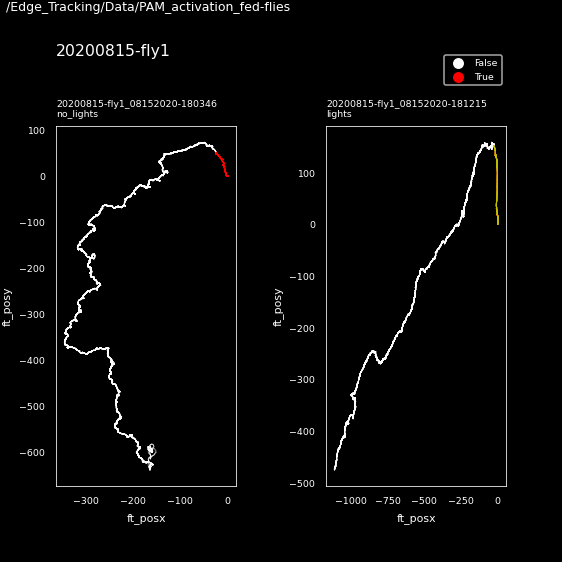

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


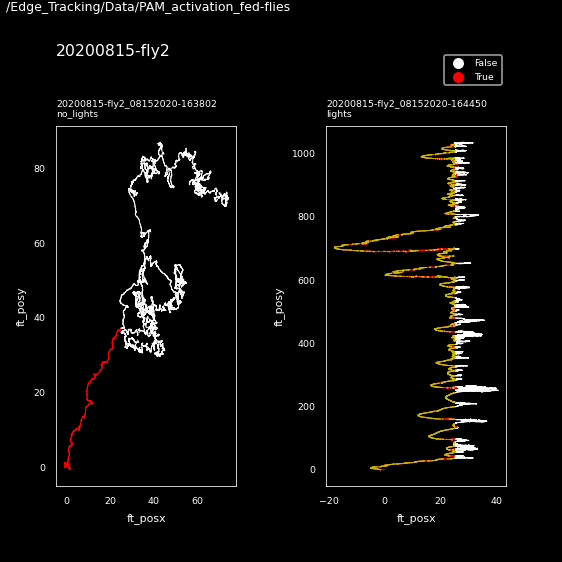

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


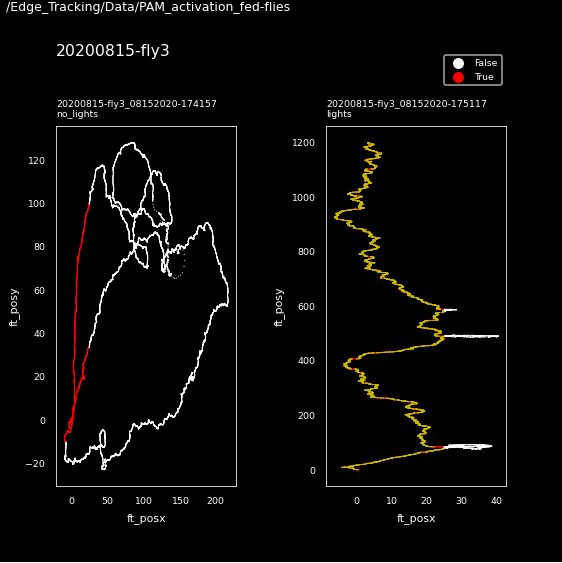

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


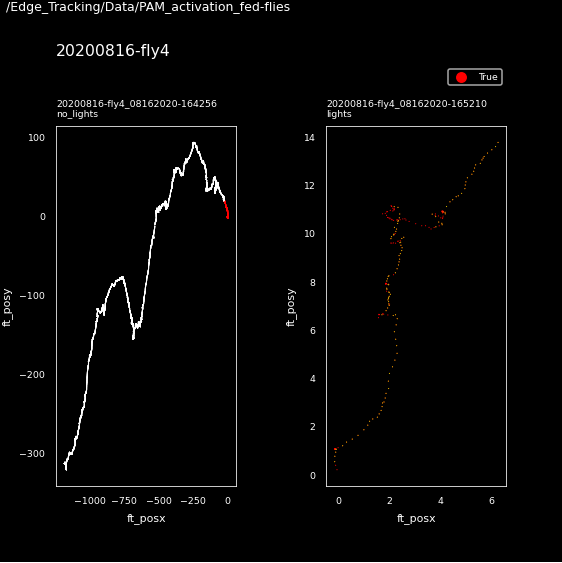

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


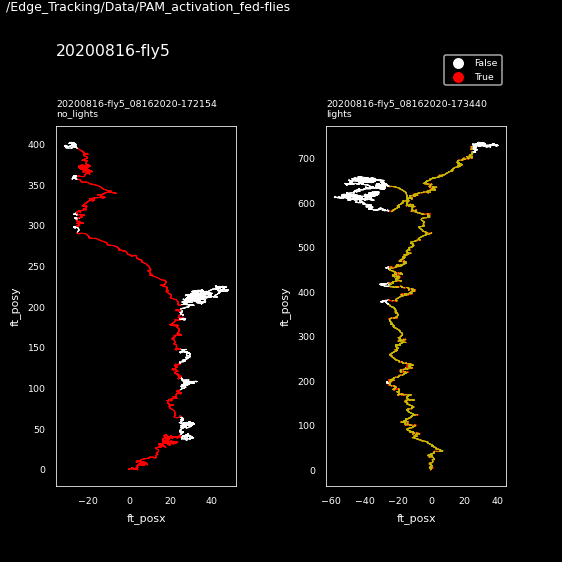

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


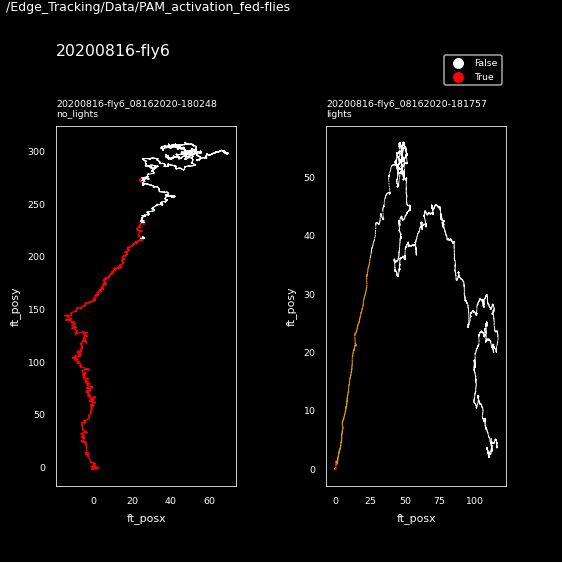

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


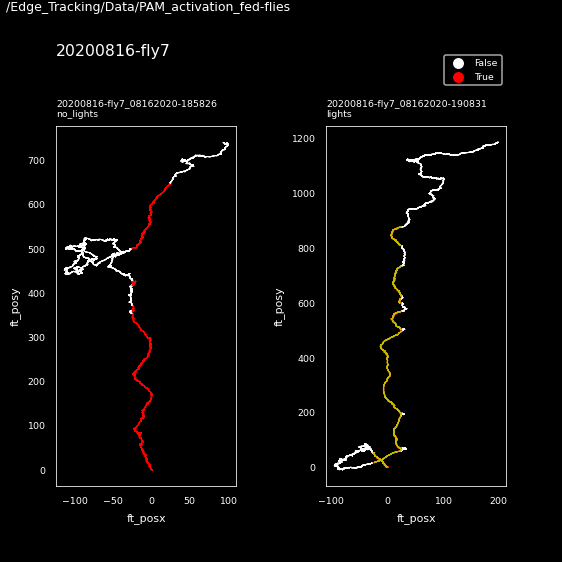

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


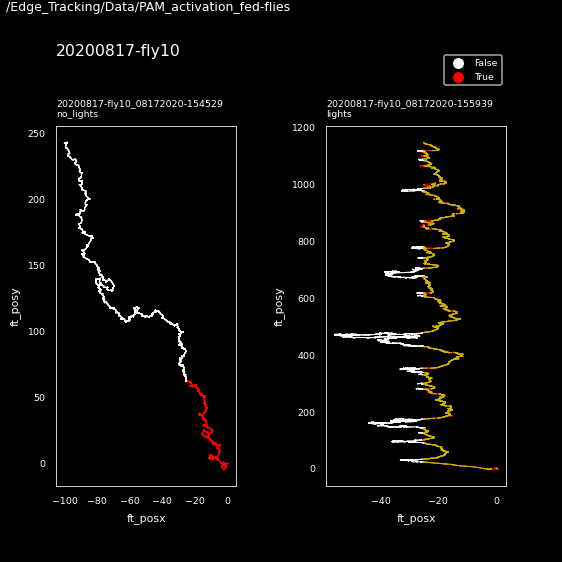

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


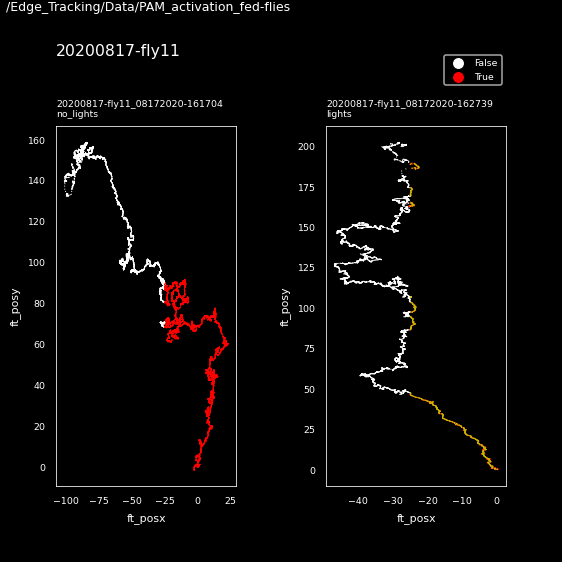

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


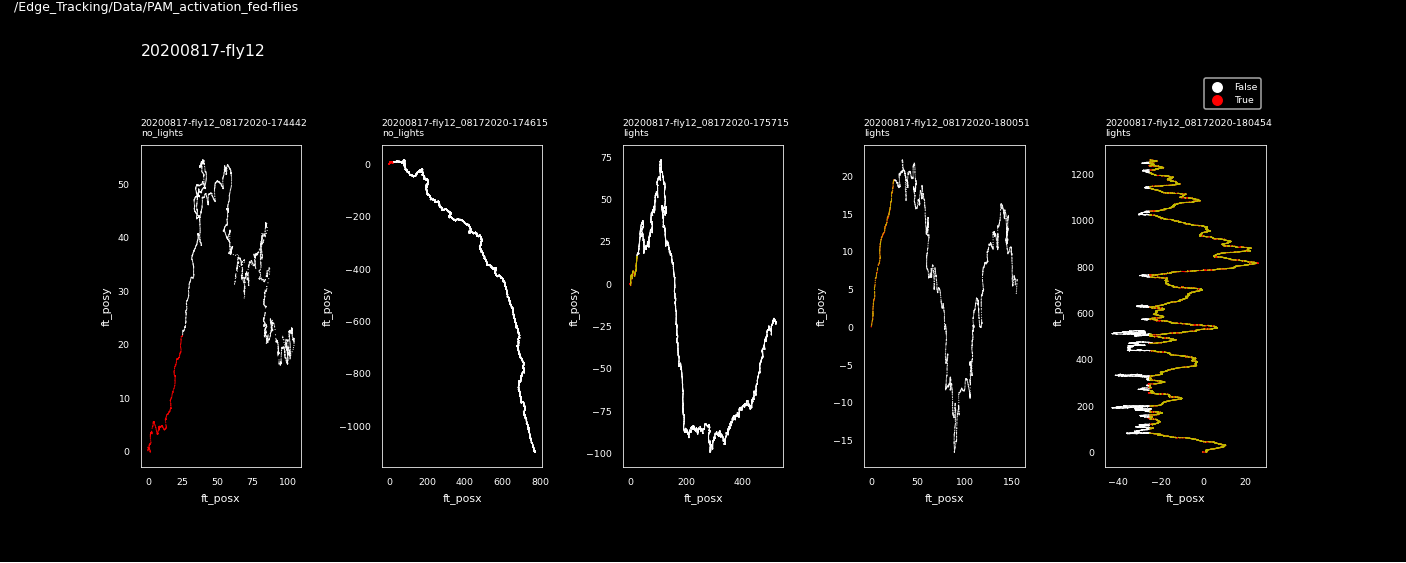

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],
/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


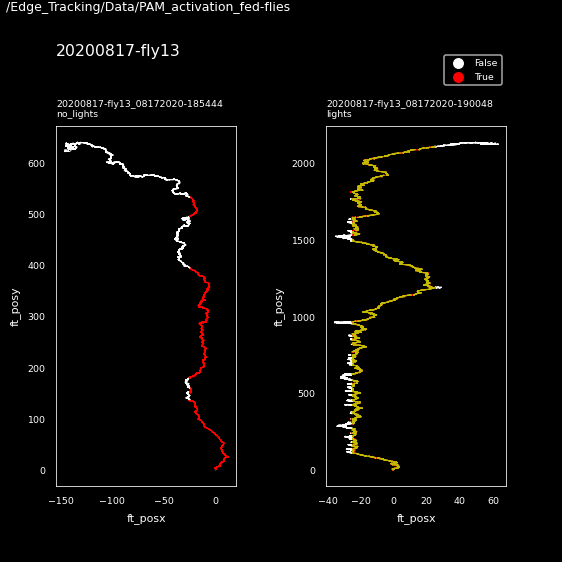

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


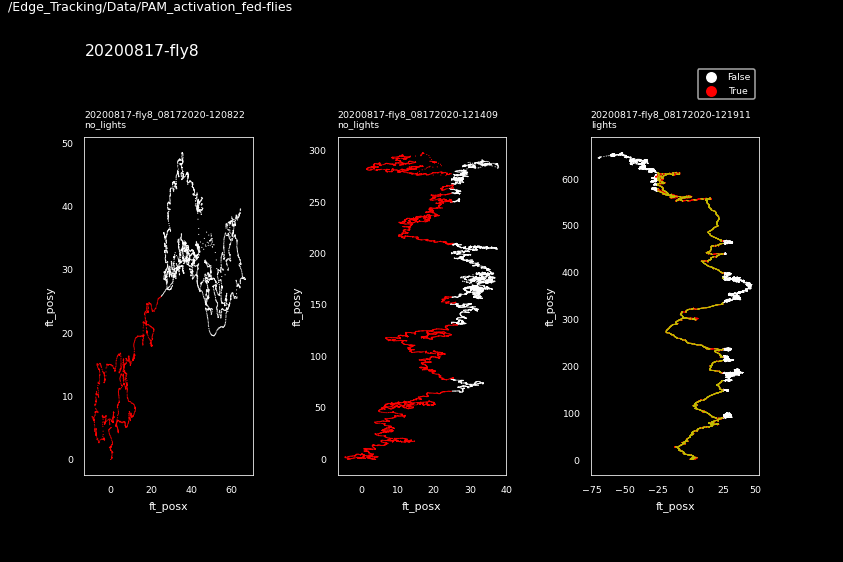

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],
/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


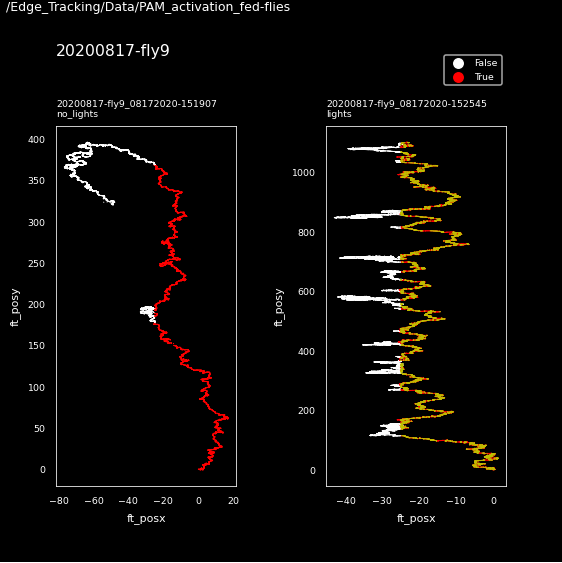

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


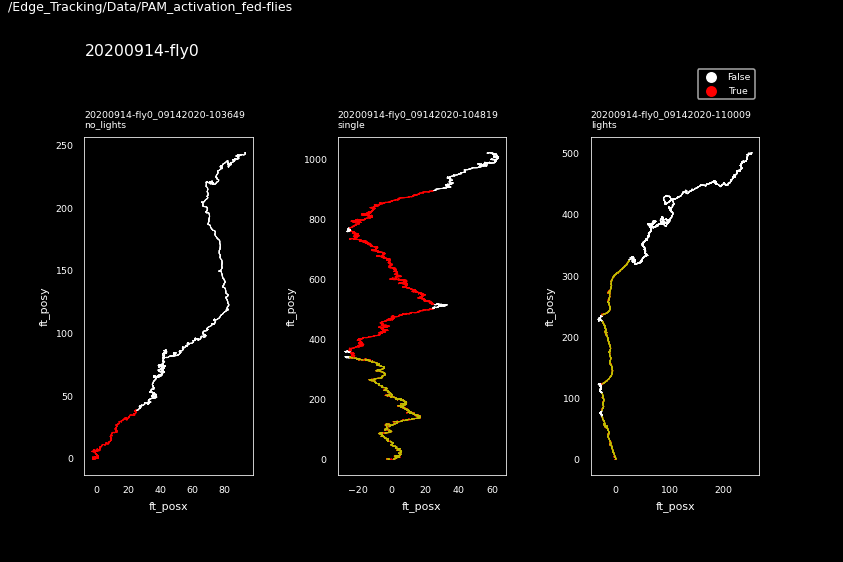

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


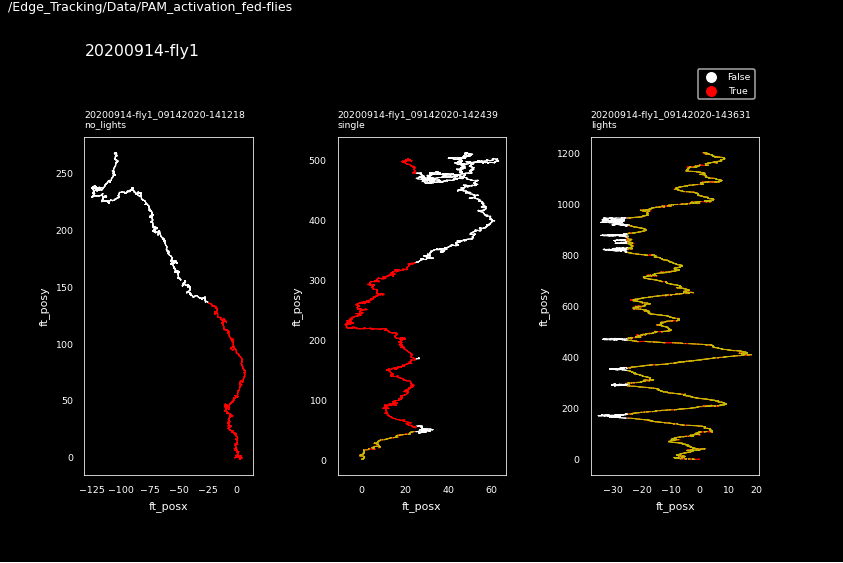

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],
/home/julianarhee/Repositories/plume-tracking/plotting.py:372: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axn = pl.subplots(1, ntrials, figsize=(ntrials*2.5, 5))


<IPython.core.display.Javascript object>


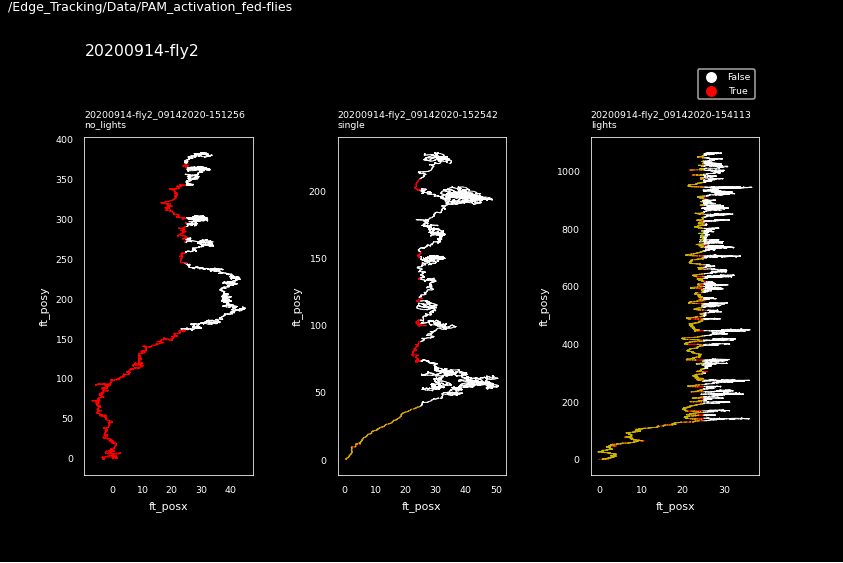

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


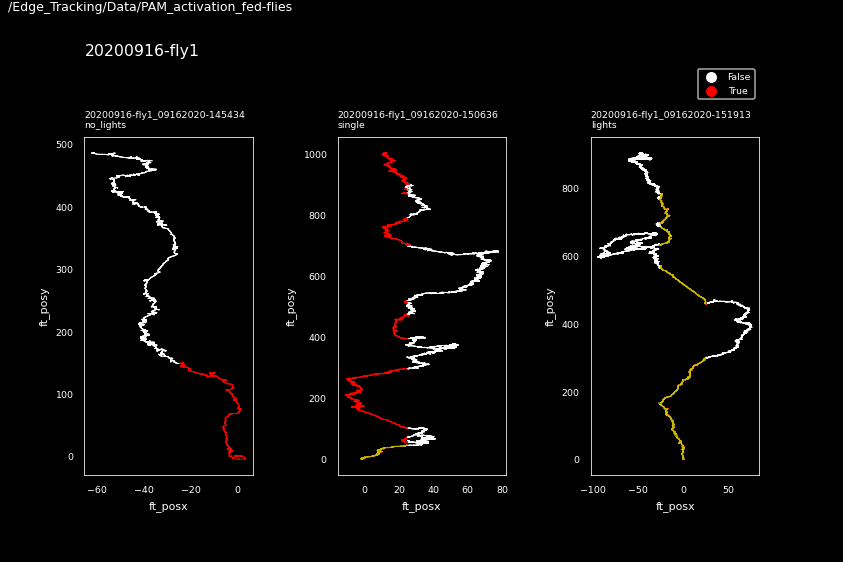

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


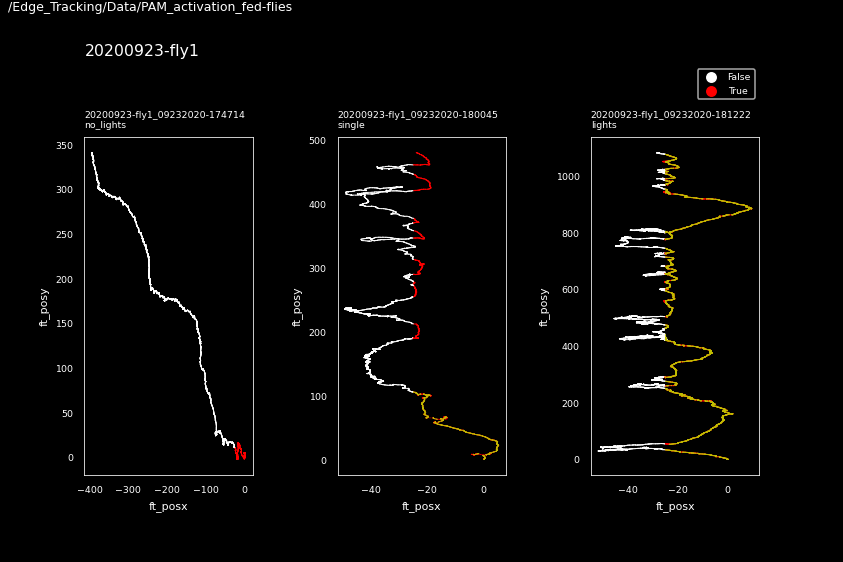

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


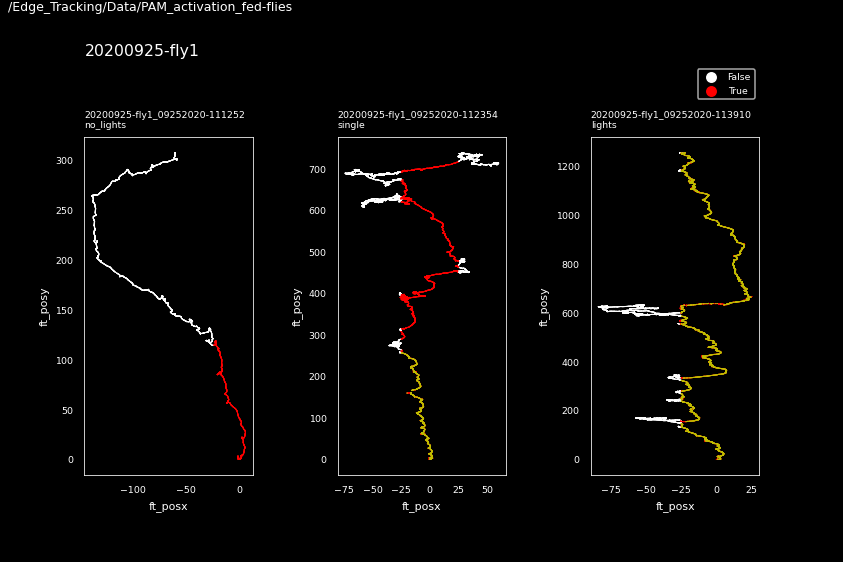

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


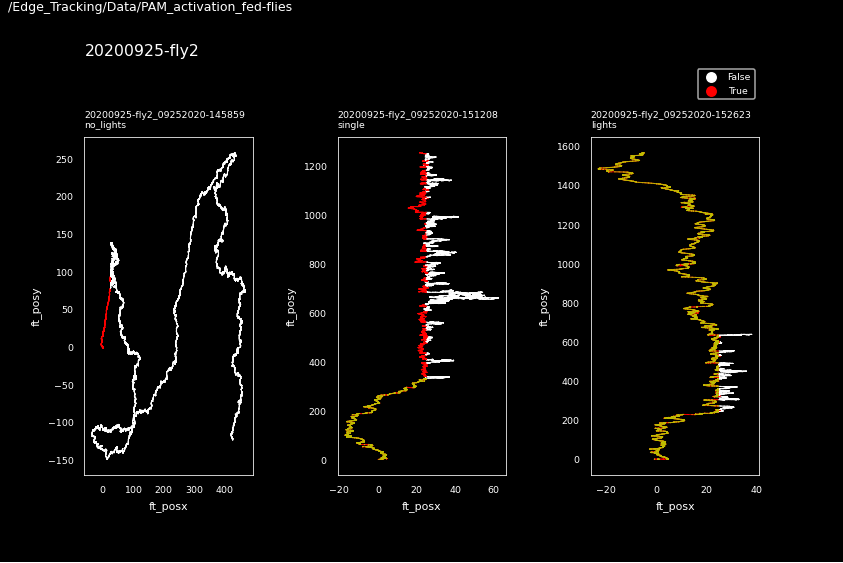

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


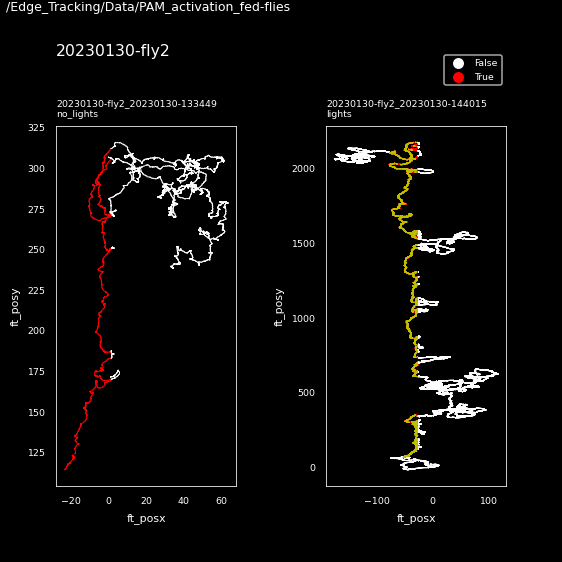

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


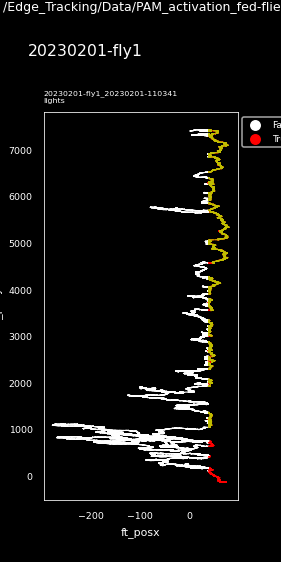

<IPython.core.display.Javascript object>


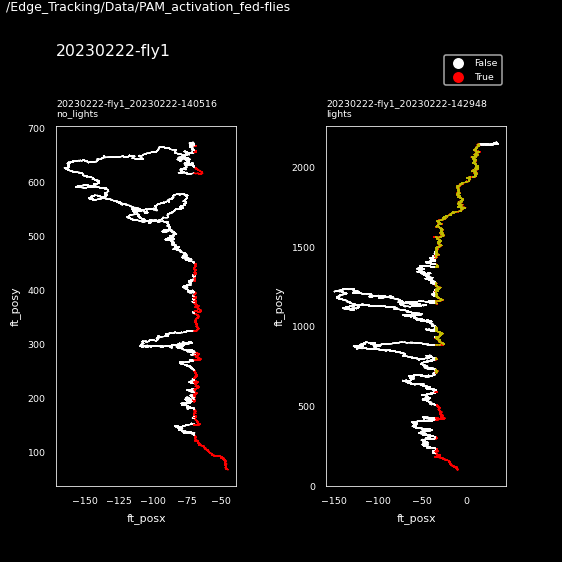

/home/julianarhee/Repositories/plume-tracking/plotting.py:398: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tdf_[tdf_['led_on']],


<IPython.core.display.Javascript object>


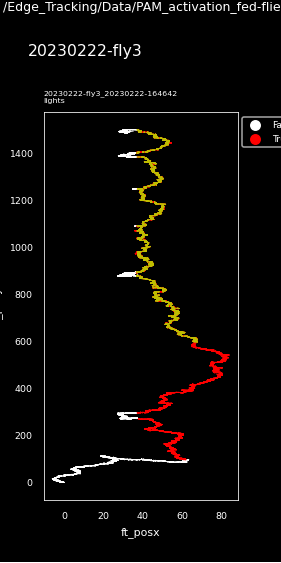

In [123]:
print(curr_figdir)
for ri, (fly_id, flydf) in enumerate(df0.groupby('fly_id')):
    fig = putil.plot_one_flys_trials(flydf)
    pl.subplots_adjust(left=0.1, right=0.9, wspace=0.5, top=0.8)
    util.label_figure(fig, fig_id)
    fig.text(0.1, 0.9, fly_id) #'{} - {}'.format(fig_id, fly_id))
    pl.savefig(os.path.join(curr_figdir, '{}.png'.format(fly_id)))

In [125]:
df0[['filename', 'strip_type']].drop_duplicates().groupby('strip_type').count()

,filename
strip_type,
constant,6
gradient,51


In [126]:
df0_all.columns

Index(['index', 'timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'ft_posx', 'ft_posy',
       'ft_heading', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'filename', 'fpath', 'timestamp', 'motor_step_command', 'time',
       'rel_time', 'date', 'odor_on', 'strip_type', 'led_on', 'instrip',
       'experiment', 'fly_name', 'condition', 'trial', 'fly_id', 'trial_id',
       'sig_status', 'passed_crit', 'reset', 'boutnum', 'cum_time', 'speed',
       'upwind_speed', 'crosswind_speed', 'euclid_dist', 'upwind_dist',
       'crosswind_dist'],
      dtype='object')

### check gradient odor strip

In [10]:
mfc_dict={}
for logfn, df_ in df0_all.groupby('filename'):
    mfc_ = butil.get_mfc_params(df_)
    mfc_dict.update({logfn: mfc_})

In [12]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [13]:
pp.pprint(mfc_dict)

{   '09142020-103649_Fly0_fed_no_lights': {   'air_max': 0.975975975975976,
                                              'air_mfc': 'mfc1_stpt',
                                              'air_min': 0.9286590584709428,
                                              'odor_mfc': 'mfc3_stpt',
                                              'odor_mfc_max': 0.0473169175050331,
                                              'odor_mfc_min': 0.0088887004922089,
                                              'percent_odor': 0.048},
    '09142020-104819_Fly0_fed_single': {   'air_max': 0.975975975975976,
                                           'air_mfc': 'mfc1_stpt',
                                           'air_min': 0.0933742285698289,
                                           'odor_mfc': 'mfc3_stpt',
                                           'odor_mfc_max': 0.882601747406147,
                                           'odor_mfc_min': 0.009537807160219,
                                  

In [18]:
df0_all['fly_id'].unique()

array(['20200914-fly0', '20200914-fly1', '20200914-fly2', '20200916-fly1',
       '20200923-fly1', '20200925-fly1', '20200925-fly2'], dtype=object)

<IPython.core.display.Javascript object>


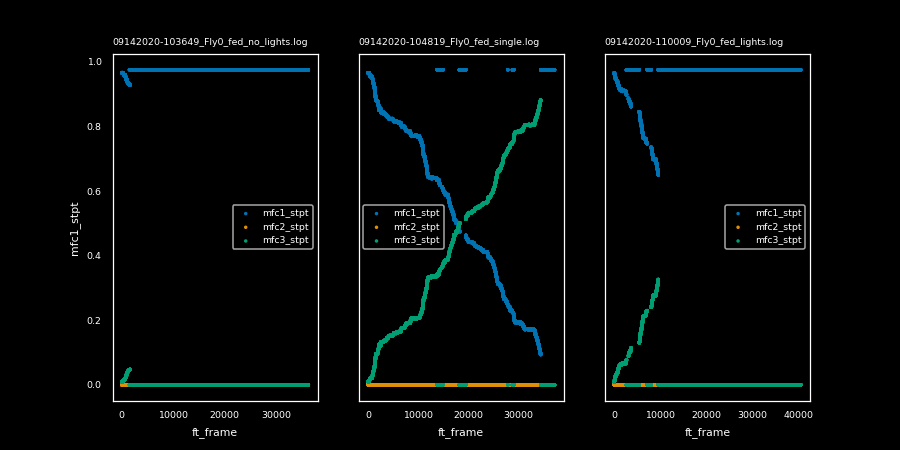

In [25]:
fly_id = '20200914-fly0'
curr_fns = df0_all[df0_all['fly_id'] == fly_id]['fpath'].unique()

fig, axn = pl.subplots(1, 3, sharey=True, figsize=(8,4))
for ax, fn in zip(axn.flat, curr_fns):
    d_ = pd.read_csv(fn)
    mfc_vars = ['mfc{}_stpt'.format(i) for i in [1,2,3]]
    mfc_cols = sns.color_palette('colorblind', n_colors=3)
    for m, c in zip(mfc_vars, mfc_cols):
        sns.scatterplot(data=d_, ax=ax, x='ft_frame', y=m, c=c, edgecolor='none', s=5, label=m)
    ax.set_title(os.path.split(fn)[-1], loc='left', fontsize=6)


In [182]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [186]:
et_flies = []
for (fly_id, cond), df_ in df0_all.groupby(['fly_id', 'condition']):
    is_et = butil.is_edgetracking(df_, strip_width=strip_width)
    print(fly_id, cond, is_et)
    if is_et:
        et_flies.append(fly_id)
et_flies = np.unique(et_flies)


20200914-fly0 pamchr_fed_lights False
20200914-fly0 pamchr_fed_no_lights False
20200914-fly0 pamchr_fed_single False
20200914-fly1 pamchr_fed_lights True
20200914-fly1 pamchr_fed_no_lights False
20200914-fly1 pamchr_fed_single False
20200914-fly2 pamchr_fed_lights True
20200914-fly2 pamchr_fed_no_lights True
20200914-fly2 pamchr_fed_single True
20200916-fly1 pamchr_fed_lights True
20200916-fly1 pamchr_fed_no_lights False
20200916-fly1 pamchr_fed_single True
20200923-fly1 pamchr_fed_lights True
20200923-fly1 pamchr_fed_no_lights False
20200923-fly1 pamchr_fed_single True
20200925-fly1 pamchr_fed_lights True
20200925-fly1 pamchr_fed_no_lights False
20200925-fly1 pamchr_fed_single False
20200925-fly2 pamchr_fed_lights True
20200925-fly2 pamchr_fed_no_lights False
20200925-fly2 pamchr_fed_single True


In [187]:
et_flies

array(['20200914-fly1', '20200914-fly2', '20200916-fly1', '20200923-fly1',
       '20200925-fly1', '20200925-fly2'], dtype='<U13')

In [188]:
et = df0_all[df0_all['fly_id'].isin(et_flies)].copy()